# Rain Anomaly Tile Layer

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# create a downloader instance
from mergedownloader.downloader import Downloader
from mergedownloader.file_downloader import FileDownloader, ConnectionType, DownloadMode
from mergedownloader.inpeparser import INPE_SERVER, InpeParsers, InpeTypes



In [ ]:

fd = FileDownloader(
    server=INPE_SERVER,
    connection_type=ConnectionType.HTTP,
    download_mode=DownloadMode.NO_UPDATE
)

downloader = Downloader(
    file_downloader=fd,
    parsers=InpeParsers,
    local_folder='/workspaces/reports_folder/downloads2/'
)

In [13]:
from rainreporter.monthly_report import MonthlyReport
from rainreporter.mapper import Mapper

from rainreporter.utils import open_json_file
reporter_config = open_json_file('../reporter.json5')

In [38]:
pacum = downloader.open_file('2024-09',datatype=InpeTypes.MONTHLY_ACCUM_MANUAL)

In [36]:
lta = downloader.open_file('2022-09', datatype=InpeTypes.MONTHLY_ACCUM)

In [39]:
pacum = pacum.rio.reproject_match(lta).mean()

In [31]:
anomaly = pacum - lta

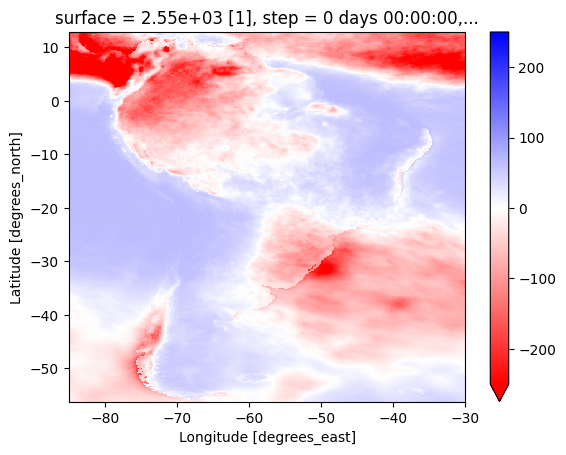

In [40]:
anomaly.plot(cmap='bwr_r', vmax=250, vmin=-250)

In [ ]:
# save the anomaly xarray.DataArray as a COG GeoTiff
anomaly.rio.to_raster('/workspaces/RainReporter/data/anomaly_2024-09.tif')


In [41]:
anomaly

<xarray.DataArray (time: 1, latitude: 691, longitude: 551)>
array([[[ -15.74267832,  -16.22705332,  -16.34424082, ...,
           30.12450918,   29.78857168,   28.32763418],
        [ -16.06038666,  -16.19319916,  -16.20621999, ...,
           30.85367584,   29.87971751,   28.92398834],
        [ -15.47965749,  -14.92757416,  -15.65674082, ...,
           31.85107168,   29.75732168,   28.46305084],
        ...,
        [-164.64892832, -174.40413666, -186.52913666, ...,
         -125.59684499, -129.48746999, -134.74267832],
        [-164.36246999, -169.87549082, -183.42757416, ...,
         -132.49788666, -136.16455332, -136.11507416],
        [-161.59684499, -178.13069916, -183.27392832, ...,
         -145.07080332, -145.90153249, -144.50049082]]])
Coordinates:
    surface      float64 2.55e+03
    step         timedelta64[ns] 00:00:00
    spatial_ref  int64 0
  * longitude    (longitude) float64 -85.05 -84.95 -84.85 ... -30.15 -30.05
  * latitude     (latitude) float64 -56.15 -56.05 -55.95 ... 12.65 12.75 12.85
  * time         (time) datetime64[ns] 2023-09-01T12:00:00

In [43]:
anomaly.rio.to_raster('/workspaces/reports_folder/tmp/anomaly_2024-09.tif')

In [47]:
import xarray as xr
import rioxarray as xrio

In [48]:
xrio.open_rasterio('/workspaces/reports_folder/tmp/anomaly_2024-09.tif')

<xarray.DataArray (band: 1, y: 691, x: 551)>
[380741 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -85.05 -84.95 -84.85 ... -30.25 -30.15 -30.05
  * y            (y) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [50]:
xrio.open_rasterio('/workspaces/reports_folder/tmp/anomaly_cog_2024-09.tif').data

array([[[ -15.74267832,  -16.22705332,  -16.34424082, ...,
           30.12450918,   29.78857168,   28.32763418],
        [ -16.06038666,  -16.19319916,  -16.20621999, ...,
           30.85367584,   29.87971751,   28.92398834],
        [ -15.47965749,  -14.92757416,  -15.65674082, ...,
           31.85107168,   29.75732168,   28.46305084],
        ...,
        [-164.64892832, -174.40413666, -186.52913666, ...,
         -125.59684499, -129.48746999, -134.74267832],
        [-164.36246999, -169.87549082, -183.42757416, ...,
         -132.49788666, -136.16455332, -136.11507416],
        [-161.59684499, -178.13069916, -183.27392832, ...,
         -145.07080332, -145.90153249, -144.50049082]]])

In [42]:
from osgeo import gdal

In [35]:
anomaly.rio.crs

CRS.from_epsg(4326)

In [ ]:
downloader.open_file('2024-09',datatype=InpeTypes.MONTHLY_ACCUM_YEARLY).mean()

<xarray.DataArray 'pacum' ()>
array(66.33995009)
Coordinates:
    spatial_ref  int64 0

In [20]:
downloader.open_file('2024-09', datatype=InpeTypes.MONTHLY_ACCUM).mean()

<xarray.DataArray 'precacum' ()>
array(82.12821199)
Coordinates:
    spatial_ref  int64 0

In [15]:
monthly = MonthlyReport(
    downloader=downloader,
    mapper=Mapper(
        config=reporter_config['shape_style'],
        shapes=reporter_config['context_shapes']
    ),
    shp_file='/workspaces/RainReporter/data/br_municipios_2020.shp',
    name='br_municipios_2020',
    month_lbk=24,
    wet_month=10
)

../data/cities/cidades.shp
../data/states/BR_UF_2022.shp
../data/rivers/main_rivers.shp
../data/dams


DriverError: /workspaces/RainReporter/data/br_municipios_2020.shp: No such file or directory